In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset_train = pd.read_csv("G://GOOG.csv")
training_set = dataset_train.iloc[:,1:2].values

In [9]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range =(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [13]:
x_train =[]
y_train =[]
for i in range(60, 1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [16]:
# importing keras models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [23]:
#Initializing RNN
regressor = Sequential()

In [24]:
regressor.add(LSTM(units =50, return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))


In [25]:
regressor.add(LSTM(units =50, return_sequences = True))
regressor.add(Dropout(0.2))


In [26]:
regressor.add(LSTM(units =50, return_sequences = True))
regressor.add(Dropout(0.2))

In [27]:
regressor.add(LSTM(units =50))
regressor.add(Dropout(0.2))

In [28]:
#Adding output layer
regressor.add(Dense(units =1))

In [30]:
#compiling
regressor.compile(optimizer='adam', loss ='mean_squared_error')


In [31]:
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0473
Epoch 2/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0066
Epoch 3/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0060
Epoch 4/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0055
Epoch 6/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0050
Epoch 7/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0043
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0043
Epoch 9/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0045
Epoch 10/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] - 9s 8

1198/1198 [==============================] - 11s 9ms/step - loss: 0.0014
Epoch 90/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0017
Epoch 91/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0016
Epoch 92/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0016
Epoch 93/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0015
Epoch 94/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0014
Epoch 95/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0016
Epoch 96/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0014
Epoch 97/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0013
Epoch 100/100
1198/1198 [==============================] - 11s 9ms/

In [39]:
#Loading test data
dataset_test = pd.read_csv("G://GOOG_test.csv")
real_stock_price = dataset_test.iloc[:,1:2].values


In [40]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60: ].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

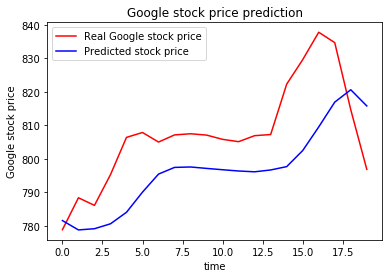

In [41]:
# visualizeing
plt.plot(real_stock_price, color='red',label ='Real Google stock price')
plt.plot(predicted_stock_price, color='blue', label='Predicted stock price')
plt.title('Google stock price prediction')
plt.xlabel('time')
plt.ylabel('Google stock price')
plt.legend()
plt.show()
